In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.0.0-rc0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder


In [5]:
file = open('WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt')
lines = file.readlines()

processedList = []

for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)

Error at line number:  281873
Error at line number:  281874
Error at line number:  281875


In [6]:
processedList

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621'],
 ['33', 'Jogging', '49106982315000', '-8.19945', '19.57244', '2.7240696'],
 ['33', 'Jogging', '49107092330000', '1.4165162', '5.7886477', '2.982856'],
 ['33', 'Jogging', '49107202316000', '-1.879608', '-2.982856', '-0.2996

In [7]:
columns = ['User','Activity','Time','x','y','z']

In [8]:
data = pd.DataFrame(data = processedList,columns=columns)
data.head()

User Activity            Time            x          y            z
0   33  Jogging  49105962326000   -0.6946377  12.680544   0.50395286
1   33  Jogging  49106062271000     5.012288  11.264028   0.95342433
2   33  Jogging  49106112167000     4.903325  10.882658  -0.08172209
3   33  Jogging  49106222305000  -0.61291564  18.496431    3.0237172
4   33  Jogging  49106332290000   -1.1849703  12.108489     7.205164

In [9]:
data.shape

(343416, 6)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
User        343416 non-null object
Activity    343416 non-null object
Time        343416 non-null object
x           343416 non-null object
y           343416 non-null object
z           343416 non-null object
dtypes: object(6)
memory usage: 15.7+ MB


In [11]:
data.isnull().sum()

User        0
Activity    0
Time        0
x           0
y           0
z           0
dtype: int64

In [12]:
data['Activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: Activity, dtype: int64

## Balance  Data

In [13]:
data['x']=data['x'].astype('float')
data['y']=data['y'].astype('float')
data['z']=data['z'].astype('float')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
User        343416 non-null object
Activity    343416 non-null object
Time        343416 non-null object
x           343416 non-null float64
y           343416 non-null float64
z           343416 non-null float64
dtypes: float64(3), object(3)
memory usage: 15.7+ MB


In [15]:
Fs = 20

In [16]:
activities = data['Activity'].value_counts().index

In [17]:
activities

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')

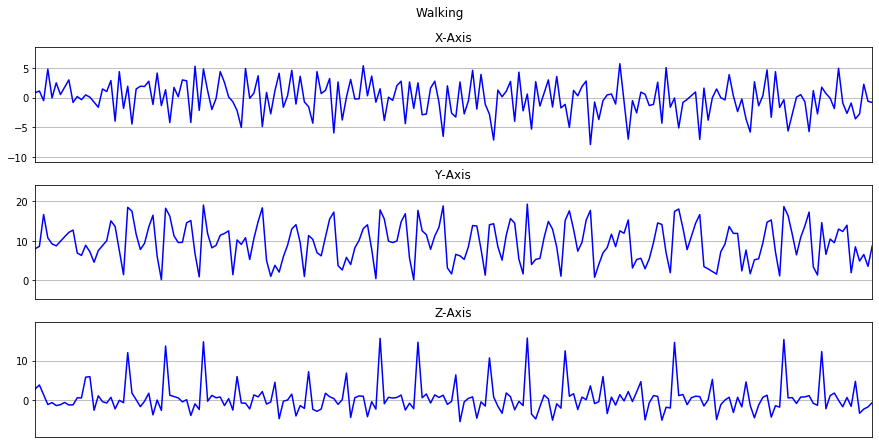

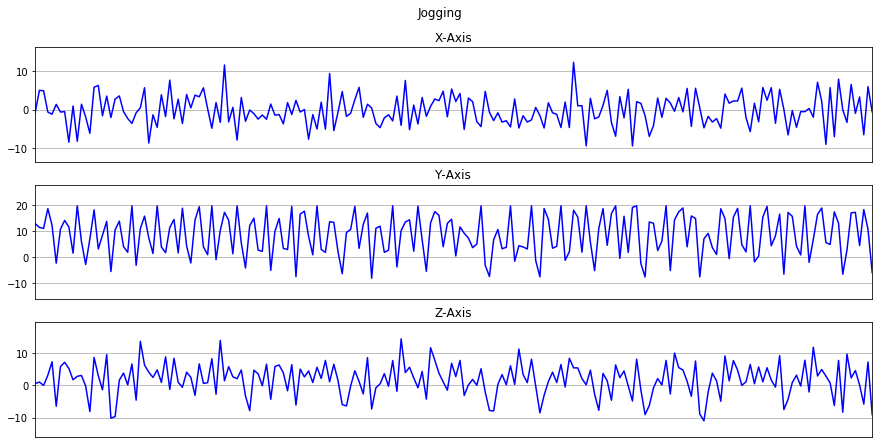

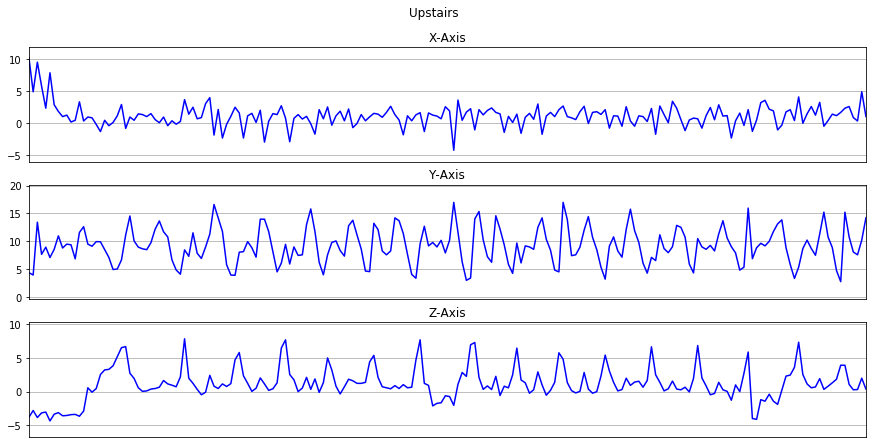

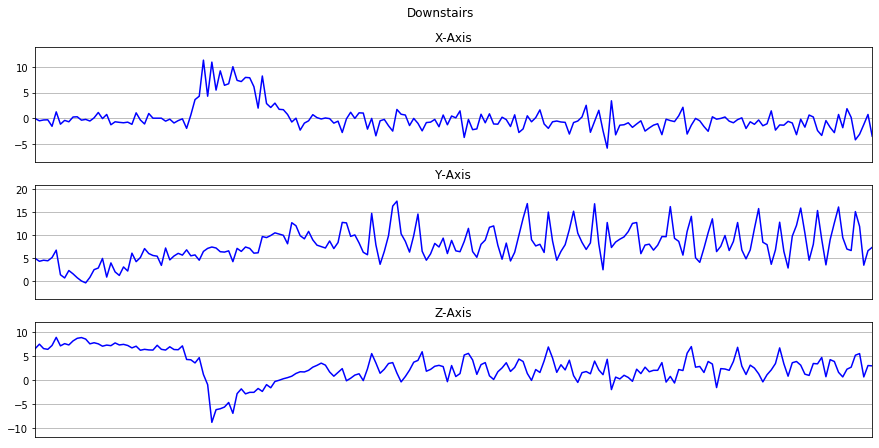

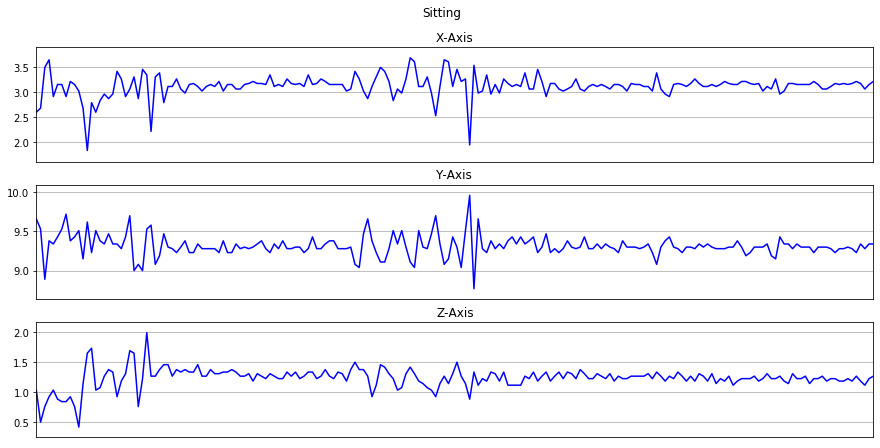

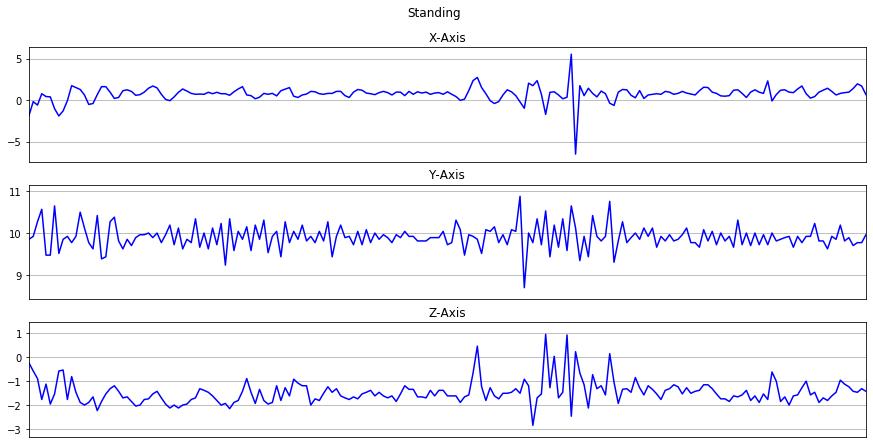

In [26]:
def plot_activity(Activity,data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['Time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['Time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['Time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(Activity)
    plt.subplots_adjust(top=0.90)
    plt.show()
    
def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'b')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for Activity in activities:
    data_for_plot = data[(data['Activity'] == Activity)][:Fs*10]
    plot_activity(Activity, data_for_plot)

In [27]:
df=data.drop(['User','Time'],axis=1).copy()
df.head()

Activity         x          y         z
0  Jogging -0.694638  12.680544  0.503953
1  Jogging  5.012288  11.264028  0.953424
2  Jogging  4.903325  10.882658 -0.081722
3  Jogging -0.612916  18.496431  3.023717
4  Jogging -1.184970  12.108489  7.205164

In [28]:
df['Activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: Activity, dtype: int64

In [32]:
Walking = df[df['Activity']=='Walking'].head(3555).copy()
Jogging = df[df['Activity']=='Jogging'].head(3555).copy()
Upstairs = df[df['Activity']=='Upstairs'].head(3555).copy()
Downstairs = df[df['Activity']=='Downstairs'].head(3555).copy()
Sitting = df[df['Activity']=='Sitting'].head(3555).copy()
Standing = df[df['Activity']=='Standing'].copy()

In [33]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])
balanced_data.shape

(21330, 4)

In [34]:
balanced_data['Activity'].value_counts()

Downstairs    3555
Sitting       3555
Standing      3555
Upstairs      3555
Walking       3555
Jogging       3555
Name: Activity, dtype: int64

In [35]:
balanced_data.head()

Activity         x          y         z
597  Walking  0.844462   8.008764  2.792171
598  Walking  1.116869   8.621680  3.786457
599  Walking -0.503953  16.657684  1.307553
600  Walking  4.794363  10.760075 -1.184970
601  Walking -0.040861   9.234595 -0.694638

In [36]:
from sklearn.preprocessing import LabelEncoder

In [43]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['Activity'])
balanced_data.head()

Activity         x          y         z  label
597  Walking  0.844462   8.008764  2.792171      5
598  Walking  1.116869   8.621680  3.786457      5
599  Walking -0.503953  16.657684  1.307553      5
600  Walking  4.794363  10.760075 -1.184970      5
601  Walking -0.040861   9.234595 -0.694638      5

In [45]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

## Standardrizing

In [46]:
X=balanced_data[['x','y','z']]
y=balanced_data['label']

In [47]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

scaled_X  = pd.DataFrame(data = X,columns = ['x','y','z'])
scaled_X['label']= y.values

scaled_X

x         y         z  label
0      0.000503 -0.099190  0.337933      5
1      0.073590  0.020386  0.633446      5
2     -0.361275  1.588160 -0.103312      5
3      1.060258  0.437573 -0.844119      5
4     -0.237028  0.139962 -0.698386      5
...         ...       ...       ...    ...
21325 -0.470217  0.178084  0.261019      3
21326 -0.542658  0.193692  0.248875      3
21327 -0.628514  0.197593  0.261019      3
21328 -0.781444  0.049322  0.155768      3
21329 -0.800225  0.267827  0.475569      3

[21330 rows x 4 columns]

## Frame Preparation

In [48]:
import scipy.stats as stats

In [49]:
Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

In [50]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [51]:
X, y = get_frames(scaled_X, frame_size, hop_size)

In [52]:
X.shape,y.shape        #(3555*)/40

((532, 80, 3), (532,))

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [55]:
X_train.shape, X_test.shape

((425, 80, 3), (107, 80, 3))

In [56]:
X_train[0].shape, X_test[0].shape

((80, 3), (80, 3))

In [57]:
X_train = X_train.reshape(425, 80, 3, 1)
X_test = X_test.reshape(107, 80, 3, 1)

In [58]:
X_train[0].shape, X_test[0].shape

((80, 3, 1), (80, 3, 1))

## Build 2D CNN Model

In [59]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

In [60]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [61]:
history = model.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), verbose=1)


Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 6s 13ms/sample - loss: 1.6414 - accuracy: 0.2306 - val_loss: 1.3925 - val_accuracy: 0.3738
Epoch 2/10
425/425 [==============================] - 1s 2ms/sample - loss: 1.2983 - accuracy: 0.4612 - val_loss: 1.0023 - val_accuracy: 0.8131
Epoch 3/10
425/425 [==============================] - 0s 914us/sample - loss: 0.9196 - accuracy: 0.6965 - val_loss: 0.5941 - val_accuracy: 0.8598
Epoch 4/10
425/425 [==============================] - 0s 1ms/sample - loss: 0.6387 - accuracy: 0.7882 - val_loss: 0.3702 - val_accuracy: 0.8972
Epoch 5/10
425/425 [==============================] - 1s 1ms/sample - loss: 0.4731 - accuracy: 0.8165 - val_loss: 0.2901 - val_accuracy: 0.9065
Epoch 6/10
425/425 [==============================] - 0s 1ms/sample - loss: 0.4251 - accuracy: 0.8565 - val_loss: 0.2806 - val_accuracy: 0.8972
Epoch 7/10
425/425 [==============================] - 0s 1ms/sample - loss: 0.3126 - ac

In [62]:
history.history

{'loss': [1.641392227902132,
  1.2983131018806906,
  0.9195607824886547,
  0.6387102820592768,
  0.47310456303989185,
  0.4251217879968531,
  0.3125593505186193,
  0.27094424966503594,
  0.26638305636013254,
  0.2537170501316295],
 'accuracy': [0.23058824,
  0.46117648,
  0.69647056,
  0.7882353,
  0.81647056,
  0.8564706,
  0.88941175,
  0.91294116,
  0.9035294,
  0.9082353],
 'val_loss': [1.3925213100754212,
  1.0022748987251353,
  0.5940991762642548,
  0.37023794372505114,
  0.2900805565241341,
  0.28064184740325,
  0.233969939785583,
  0.26069375037032866,
  0.2202057273727711,
  0.2187226723148444],
 'val_accuracy': [0.37383178,
  0.8130841,
  0.8598131,
  0.89719623,
  0.90654206,
  0.89719623,
  0.89719623,
  0.89719623,
  0.89719623,
  0.90654206]}

## Ploting Learning Curve

In [63]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

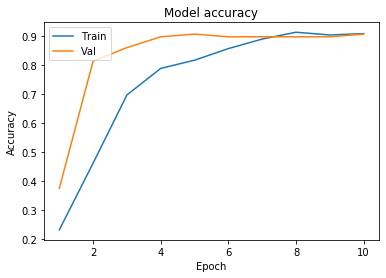

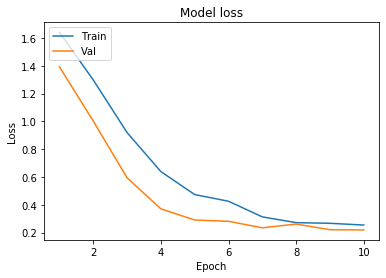

In [64]:
plot_learningCurve(history, 10)

## Ploting Confusion Matrix

In [66]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [68]:
y_pred = model.predict_classes(X_test)

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x20ce2fff208>)

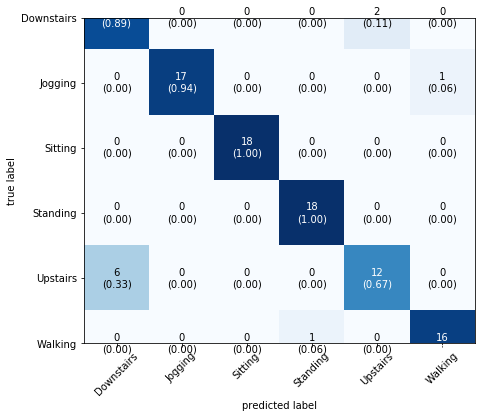

In [70]:
mat =mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))

model.save_weights('model.h5')